# Variance Threashold
Dimensionality Reduction

In [6]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold, chi2#, f_classifier, f_regressor

In [3]:
iris = load_iris()

In [7]:
variance_threshold = VarianceThreshold(threshold=.5)

In [10]:
np.var(iris.data)

3.896056416666667

In [11]:
np.var(iris.data[:,0])

0.6811222222222223

In [12]:
np.var(iris.data[:,1])

0.1887128888888889

In [13]:
np.var(iris.data[:,2])

3.0955026666666665

In [14]:
np.var(iris.data[:,3])

0.5771328888888888

In [16]:
np.var(iris.data[:,1:])

2.452657580246913

In [18]:
variance_threshold.fit_transform(iris.data)
# We have removed the second columns whose var<.5

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1],
       [5.4, 1.5, 0.2],
       [4.8, 1.6, 0.2],
       [4.8, 1.4, 0.1],
       [4.3, 1.1, 0.1],
       [5.8, 1.2, 0.2],
       [5.7, 1.5, 0.4],
       [5.4, 1.3, 0.4],
       [5.1, 1.4, 0.3],
       [5.7, 1.7, 0.3],
       [5.1, 1.5, 0.3],
       [5.4, 1.7, 0.2],
       [5.1, 1.5, 0.4],
       [4.6, 1. , 0.2],
       [5.1, 1.7, 0.5],
       [4.8, 1.9, 0.2],
       [5. , 1.6, 0.2],
       [5. , 1.6, 0.4],
       [5.2, 1.5, 0.2],
       [5.2, 1.4, 0.2],
       [4.7, 1.6, 0.2],
       [4.8, 1.6, 0.2],
       [5.4, 1.5, 0.4],
       [5.2, 1.5, 0.1],
       [5.5, 1.4, 0.2],
       [4.9, 1.5, 0.2],
       [5. , 1.2, 0.2],
       [5.5, 1.3, 0.2],
       [4.9, 1.4, 0.1],
       [4.4, 1.3, 0.2],
       [5.1, 1.5, 0.2],
       [5. , 1.3, 0.3],
       [4.5, 1.3

In [19]:
iris.data[:1]

array([[5.1, 3.5, 1.4, 0.2]])

## Removal of highly correlated features

In [20]:
features = iris.data

In [22]:
fea_df = pd.DataFrame(features, columns = iris.feature_names)

In [24]:
fea_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
fea_df['Species'] = iris.target

In [27]:
fea_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
c = fea_df.corr()
c

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Species,0.782561,-0.426658,0.949035,0.956547,1.000000


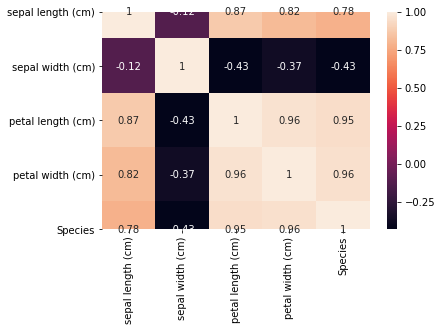

In [29]:
sns.heatmap(fea_df.corr(), annot=True)

In [31]:
np.where(c>.95)

(array([0, 1, 2, 2, 3, 3, 3, 4, 4]), array([0, 1, 2, 3, 2, 3, 4, 3, 4]))

In [32]:
np.where((c<.95))

(array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 4]),
 array([1, 2, 3, 4, 0, 2, 3, 4, 0, 1, 4, 0, 1, 0, 1, 2]))

In [35]:
np.where((c<.95)&(c>.95))

(array([], dtype=int64), array([], dtype=int64))

## Removal of Irrelevant features for classification

In [40]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression

In [37]:
features = iris.data.astype(int)
target = iris.target

In [38]:
chi2_selector = SelectKBest(chi2, k = 2)

In [39]:
chi2_selector.fit_transform(features,target)

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [3, 1],
       [4, 1],
       [3, 1],
       [3, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [3, 1],
       [4, 1],
       [4,

In [42]:
from sklearn.feature_selection import SelectFromModel

In [43]:
from sklearn.svm import LinearSVC

In [44]:
svc = LinearSVC().fit(iris.data, iris.target)

/root/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [50]:
model = SelectFromModel(svc)

In [51]:
model.fit_transform(iris.data, iris.target)

/root/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([[3.5, 1.4, 0.2],
       [3. , 1.4, 0.2],
       [3.2, 1.3, 0.2],
       [3.1, 1.5, 0.2],
       [3.6, 1.4, 0.2],
       [3.9, 1.7, 0.4],
       [3.4, 1.4, 0.3],
       [3.4, 1.5, 0.2],
       [2.9, 1.4, 0.2],
       [3.1, 1.5, 0.1],
       [3.7, 1.5, 0.2],
       [3.4, 1.6, 0.2],
       [3. , 1.4, 0.1],
       [3. , 1.1, 0.1],
       [4. , 1.2, 0.2],
       [4.4, 1.5, 0.4],
       [3.9, 1.3, 0.4],
       [3.5, 1.4, 0.3],
       [3.8, 1.7, 0.3],
       [3.8, 1.5, 0.3],
       [3.4, 1.7, 0.2],
       [3.7, 1.5, 0.4],
       [3.6, 1. , 0.2],
       [3.3, 1.7, 0.5],
       [3.4, 1.9, 0.2],
       [3. , 1.6, 0.2],
       [3.4, 1.6, 0.4],
       [3.5, 1.5, 0.2],
       [3.4, 1.4, 0.2],
       [3.2, 1.6, 0.2],
       [3.1, 1.6, 0.2],
       [3.4, 1.5, 0.4],
       [4.1, 1.5, 0.1],
       [4.2, 1.4, 0.2],
       [3.1, 1.5, 0.2],
       [3.2, 1.2, 0.2],
       [3.5, 1.3, 0.2],
       [3.6, 1.4, 0.1],
       [3. , 1.3, 0.2],
       [3.4, 1.5, 0.2],
       [3.5, 1.3, 0.3],
       [2.3, 1.3

In [52]:
from sklearn.decomposition import PCA

In [53]:
pca = PCA(n_components=3)

In [56]:
X= pca.fit_transform(iris.data)

In [58]:
svc.fit(X, iris.target)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [59]:
svc.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [129]:
from sklearn.metrics import accuracy_score
#accuracy_score()

In [130]:
model.score(X,  iris.target)

AttributeError: 'SelectFromModel' object has no attribute 'score'

In [124]:
pca.score(iris.data,  iris.target)

-2.532808843783389

In [79]:
pca2 = PCA(n_components=.9, whiten=True)

In [80]:
d = pca2.fit_transform(iris.data)

In [81]:
np.var(iris.data)

3.896056416666667

In [82]:
np.var(d)

0.9933333333333335

In [125]:
pca2.score(X,  iris.target)

-125.63585357046135

In [84]:
help(pca)

Help on PCA in module sklearn.decomposition.pca object:

class PCA(sklearn.decomposition.base._BasePCA)
 |  PCA(n_components=None, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
 |  
 |  Principal component analysis (PCA)
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 |  Read more in the :ref:`User Guide <PCA>`.
 |  
 |  Para

In [85]:
from sklearn.datasets import make_circles

In [88]:
features, col = make_circles(n_samples=1000,noise=.1)

In [92]:
features.shape

(1000, 2)

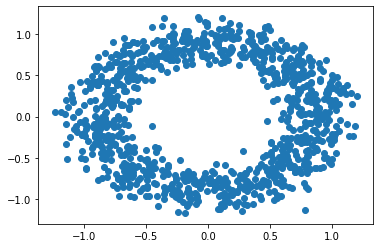

In [93]:
plt.scatter(features[:,0], features[:,1])

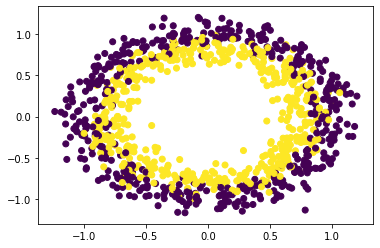

In [94]:
plt.scatter(features[:,0], features[:,1], c=col)

In [95]:
from sklearn.decomposition import KernelPCA

In [97]:
kpca = KernelPCA(kernel="rbf",gamma=15, n_components=1)

In [99]:
X = kpca.fit_transform(features)

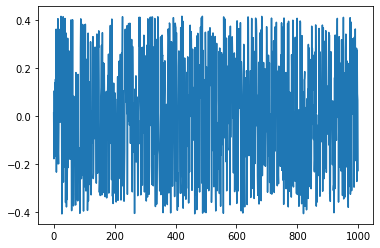

In [100]:
plt.plot(X)

# Outlier detection

In [102]:
from sklearn.datasets import make_blobs

In [110]:
features, col = make_blobs(centers= 1, cluster_std=.2)
# Create an outlier
features[0,1] = 5
features[1,1] = 5

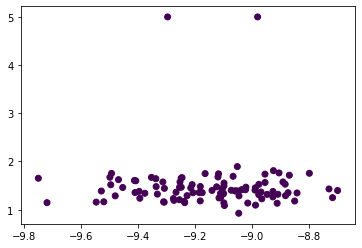

In [120]:
plt.scatter(features[:,0], features[:,1], c=col)

In [113]:
from sklearn.covariance import EllipticEnvelope

In [114]:
env = EllipticEnvelope(contamination=.1)

In [115]:
env.fit(features)

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
                 store_precision=True, support_fraction=None)

In [116]:
env.predict(features)

array([-1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1])

In [119]:
env.score(features,col)

0.0